In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
import random as r
import scipy.sparse as scp
from matplotlib.ticker import PercentFormatter

In [2]:
def collaborators(N, adj, alpha, beta, frac, it):

    est = np.zeros(N, dtype = int)
    est1 = np.zeros(N, dtype = int)
    est2 = np.zeros(N, dtype = int)

    ###### paciente cero: el primer infectado por el virus
    pac0 = r.randint(0, N-1)
    est[pac0] = 1
    est1[pac0] = 1

    ###### colaboradores
    #frac = 0.4
    Ncol = frac*N
    cont = 0
    while cont < np.int(Ncol):
        hums = np.where(est1 == 0)[0]
        index = r.randint(0,N)
        inside = index in hums
        if inside == True and est2[index]==0 :
            est2[index] = 1
            cont = cont + 1

    nH = np.zeros(it, dtype = int)
    nZ = np.zeros(it, dtype = int)
    nR = np.zeros(it, dtype = int)
    nC = np.zeros(it, dtype = int)

    suma = np.zeros(it, dtype = int)

    for t in range(0, it): # time

        ##### RECUENTO #####
        nH[t] = len(np.where(est1 == 0)[0])
        nZ[t] = len(np.where(est1 == 1)[0])
        nR[t] = len(np.where(est1 == 2)[0])
        nC[t] = len(np.intersect1d(np.where(est1 == 0), np.where(est2 == 1)))

        ##### INFECTION #####
        # Identificamos los zombies en la red y las infecciones que producen

        zombies = np.where(est == 1)[0]

        for i in range(0, len(zombies)): # tenemos que buscar los contactos con humanos de cada zombie

            z = zombies[i] # nodo z es un zombie
            rel = adj[z,:].indices # nodos que están conectados con z
            relh = rel[est1[rel]==0] # nodos humanos conectados con z

            for j in range(0, len(relh)): # para cada nodo humano conectado con un zombie, comprobamos si está infectado

                h = relh[j] # humano
                rh = adj[h,:].indices # relaciones de ese humano
                rh_col = rh[est2[rh]==1] # cuáles de esas relaciones son colaboradores
                numcol = len(rh_col) # número de colaboradores totales

                hums_tobe_infected = np.concatenate((np.array([h]), rh_col), axis = 0)
                # todos los colaboradores hacen que la beta de h se reduzca pero se exponen todos al patógeno

                for k in hums_tobe_infected:
                    if r.uniform(0, 1) < beta/np.exp(0.5*numcol): # the node is infected
                        est1[k] = 1 # human turns into zombie


        ##### ZOMBIE REMOVAL #####
        # En cada paso temporal, eliminamos a ciertos zombies que no han sido infectados en esta misma iteración.

        zombies_removal = np.where(est == 1)[0] # buscamos los zombies que NO han aparecido en esta misma iteración
        for i in range(0, len(zombies_removal)):
            if r.uniform(0, 1) < alpha:
                est1[zombies_removal[i]] = 2 

        est = est1
        suma[t] = nH[t] + nZ[t] + nR[t]
        
    return nH, nZ, nR, nC

In [4]:
N = 5000
kav = 10
p = kav/(N-1)
it = 500

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.03 # infection probability in a zombie-human encounter
alpha = 0.03 # removal probability

frac = 0.3

nH, nZ, nR, nC = collaborators(N, adj, alpha, beta, frac,it)

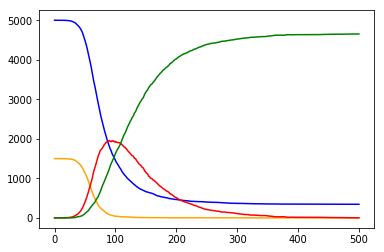

In [5]:
plt.plot( np.linspace(0,it,it), nC, color = 'orange')
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nR, color = 'green')

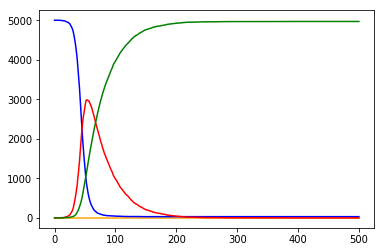

In [10]:
plt.plot( np.linspace(0,it,it), nC, color = 'orange')
plt.plot( np.linspace(0,it,it), nH, color = 'blue')
plt.plot( np.linspace(0,it,it), nZ, color = 'red')
plt.plot( np.linspace(0,it,it), nR, color = 'green')

In [6]:
print('Porcentaje de no colaboradores muertos')
print((nH[0] - nC[0] - (nH[-1] - nC[-1]))/(nH[0] - nC[0]))
print('Porcentaje de colaboradores muertos')
print((nC[0] - nC[-1])/nC[0])

Porcentaje de no colaboradores muertos
0.901686196056016
Porcentaje de colaboradores muertos
0.9993333333333333


In [8]:
print (nH[-1]-nC[-1])
print(nC[-1])

344
1


In [9]:
N = 5000
kav = 10
p = kav/(N-1)
it = 500

net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net) # adj is a Sparse Matrix of CSR (compressed sparse row) format. 
                               # this means that row slicing is fast

beta = 0.03 # infection probability in a zombie-human encounter
alpha = 0.03 # removal probability

frac = 0.00001

nH, nZ, nR, nC = collaborators(N, adj, alpha, beta, frac,it)

# CORRED ESTA CELDA

In [ ]:
N = 5000
kav = 10
p = kav/(N-1)
net = nx.fast_gnp_random_graph(N, p, directed = False) 
adj = nx.adjacency_matrix(net)  

## VICTOR: DESCOMENTA LA SIGUIENTE LÍNEA
#frac_list = np.linspace(0.05,0.55,11)
## ANTONIO: DESCOMENTA LA SIGUIENTE LÍNEA
# frac_list = np.linspace(0.55,0.95,9)

rep = 30
it = 500

beta = 0.03 
alpha = 0.03 

nHav = np.zeros(np.size(frac_list))
nZav = np.zeros(np.size(frac_list))
nRav = np.zeros(np.size(frac_list))
nCav = np.zeros(np.size(frac_list))

for j in range(0,np.size(frac_list)):
    
    nHfinal = np.zeros(rep)
    nZfinal = np.zeros(rep)
    nRfinal = np.zeros(rep)
    nCfinal = np.zeros(rep)
    
    frac = frac_list[j]
    for i in range(0, rep):
        nH, nZ, nR, nC = collaborators(N, adj, alpha, beta, frac, it)
        nHfinal[i] = nH[-1]
        nZfinal[i] = nZ[-1]
        nRfinal[i] = nR[-1]
        nCfinal[i] = nC[-1]
    
    nHav[j] = np.average(nHfinal)
    nZav[j] = np.average(nZfinal)
    nRav[j] = np.average(nRfinal)
    nCav[j] = np.average(nCfinal)


In [31]:
N = 5000
nHav2 = np.load('nHav2.npy')
nCav2 = np.load('nCav2.npy')
nHavsigma2 = np.load('nHavsigma2.npy')
nCavsigma2 = np.load('nCavsigma2.npy')
nHav1 = np.load('nHav_victor.npy')
nCav1 = np.load('nCav_victor.npy')
nHavsigma1 = np.load('nHsigma_victor.npy')
nCavsigma1 = np.load('nCsigma_victor.npy')
nHav = np.concatenate((nHav1,nHav2), axis = 0)
nCav = np.concatenate((nCav1,nCav2), axis = 0)
nHavsigma = np.concatenate((nHavsigma1,nHavsigma2), axis = 0)
nCavsigma = np.concatenate((nCavsigma1,nCavsigma2), axis = 0)

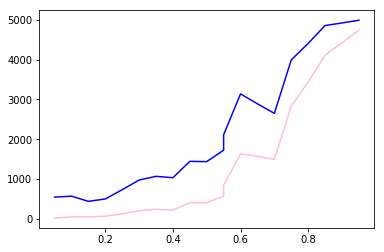

In [44]:
frac_list1 = np.linspace(0.05,0.55,11)
frac_list2 = np.linspace(0.55,0.95,9)
frac_list = np.concatenate((frac_list1, frac_list2), axis = 0)
plt.plot(frac_list, nHav, color = 'blue')
plt.plot(frac_list, nCav, color = 'pink')
#plt.errorbar(frac_list, nHav, yerr=nHavsigma, fmt='-o')
#plt.errorbar(frac_list, nCav, yerr=nCavsigma, fmt='-o')

In [ ]:
print('Porcentaje de no colaboradores muertos')
print((nH[0] - nC[0] - (nH[-1] - nC[-1]))/(nH[0] - nC[0]))
print('Porcentaje de colaboradores muertos')
print((nC[0] - nC[-1])/nC[0])

In [41]:
notcol_dead = np.zeros(np.size(frac_list))
col_dead = np.zeros(np.size(frac_list))
for i in range(0,np.size(frac_list)):
    notcol_dead[i] =(N-1 - N*frac_list[i] - (nHav[i] - nCav[i]))/(N-1 - N*frac_list[i])
    col_dead[i] = (N*frac_list[i] - nCav[i])/(N*frac_list[i])

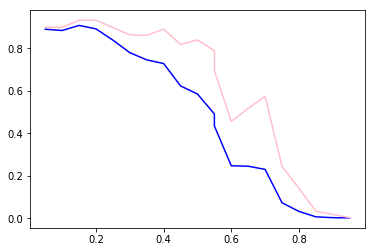

In [43]:
plt.plot(frac_list, notcol_dead, color = 'blue')
plt.plot(frac_list, col_dead, color = 'pink')